In [1]:
install.packages("dplyr")    # alternative installation of the %>%
library(dplyr)    # alternatively, this also loads %>%
library(repr)
library(ggplot2)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [ ]:
#https://stackoverflow.com/questions/5690023/character-encoding-for-french-accents
data <- read.csv(file = 'listings.csv',header=TRUE, encoding = "UTF-8")
calendar <- read.csv(file = 'myCalendar.csv',header=TRUE, encoding = "UTF-8")

In [3]:
#head(data)
#ncol(data)
#summary(data)

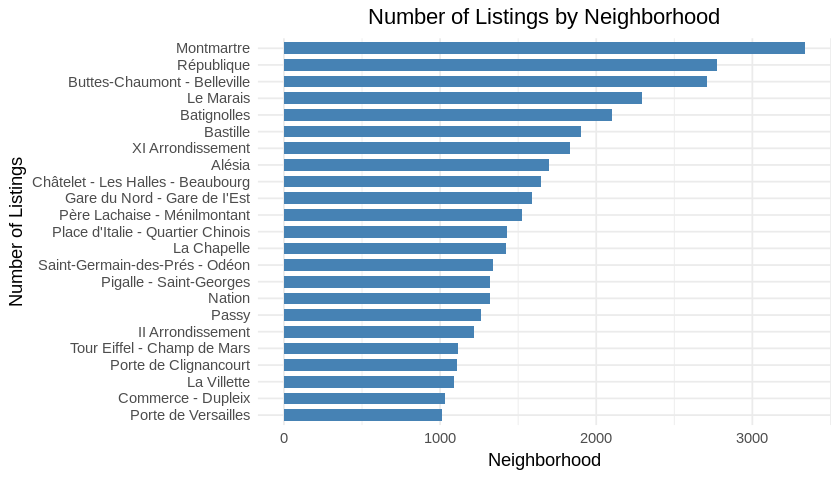

In [4]:
options(repr.plot.width=7, repr.plot.height=4)
par(las=2)
par(mar=c(5,8,4,2)) # increase y-axis margin.

data_n <-data %>% group_by(host_neighbourhood) %>% filter(n() > 1000&n()<14000)
cyl_table <- table(data_n$host_neighbourhood)
cyl_levels <- names(cyl_table)[order(cyl_table)]
data_n$host_neighbourhood <- factor(data_n$host_neighbourhood, levels = cyl_levels)
invisible(p<-ggplot(data_n, aes(x=data_n$host_neighbourhood))+ 
                    geom_bar(width=0.7, fill="steelblue")+theme_minimal())
print(p+ labs(y="Neighborhood", x = "Number of Listings", title 
                  = "Number of Listings by Neighborhood")+theme(plot.title = element_text(hjust = 0.5))+coord_flip())

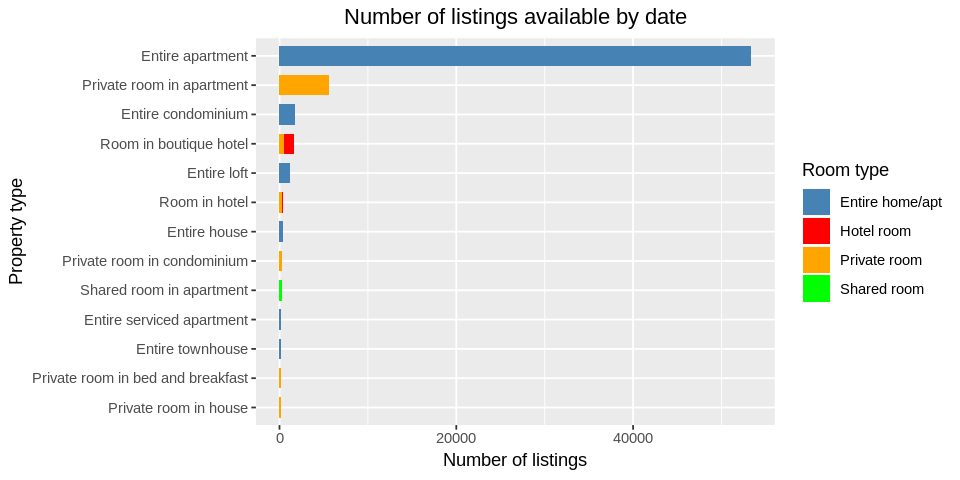

In [5]:
data_p <-data %>% group_by(property_type) %>% filter(n() > 100)

cyl_table <- table(data_p$property_type)
cyl_levels <- names(cyl_table)[order(cyl_table)]
data_p$property_type <- factor(data_p$property_type, levels = cyl_levels)

colors <- c("steelblue","red","orange","green")

options(repr.plot.width=8, repr.plot.height=4)

invisible(p<-ggplot(data_p, aes(x=data_p$property_type, fill = room_type))+
  geom_bar(width=0.7)+scale_fill_manual(values = colors))
print(p + labs(y="Number of listings", x = "Property type", title 
                = "Number of listings available by date", fill = "Room type")+theme(plot.title = element_text(hjust = 0.5)
                )+coord_flip())

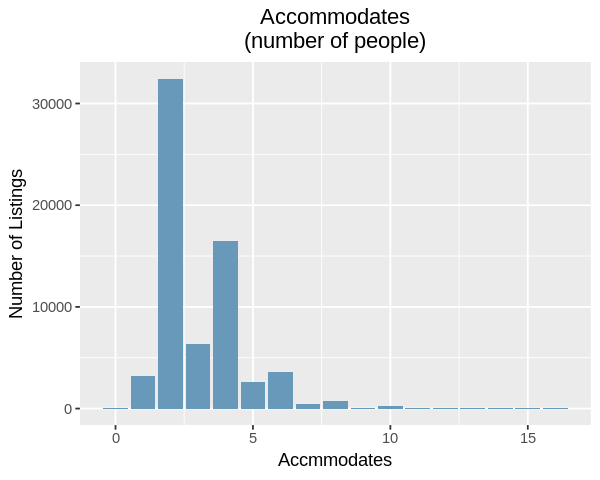

In [6]:
#-- to change the size of the plot
#https://stackoverflow.com/questions/45473128/r-changing-ggplot-plot-size-in-jupyter 
# -- set title and labels
#http://environmentalcomputing.net/plotting-with-ggplot-adding-titles-and-axis-names/#:~:text=To%20alter%20the%20labels%20on,line%20of%20basic%20ggplot%20code.&text=Note%3A%20You%20can%20also%20use,which%20is%20equivalent%20to%20ggtitle%20.
#--centering the title
#https://www.datanovia.com/en/blog/ggplot-title-subtitle-and-caption/#:~:text=The%20default%20ggplot%20title%20alignment,element_text(hjust%20%3D%200.5))%20.
options(repr.plot.width=5, repr.plot.height=4)
acco <- ggplot(data, aes(accommodates)) + geom_bar(fill = "#6898ba")
print(acco + labs(y="Number of Listings", x = "Accmmodates", title 
                  = "Accommodates\n(number of people)")+theme(plot.title = element_text(hjust = 0.5)))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

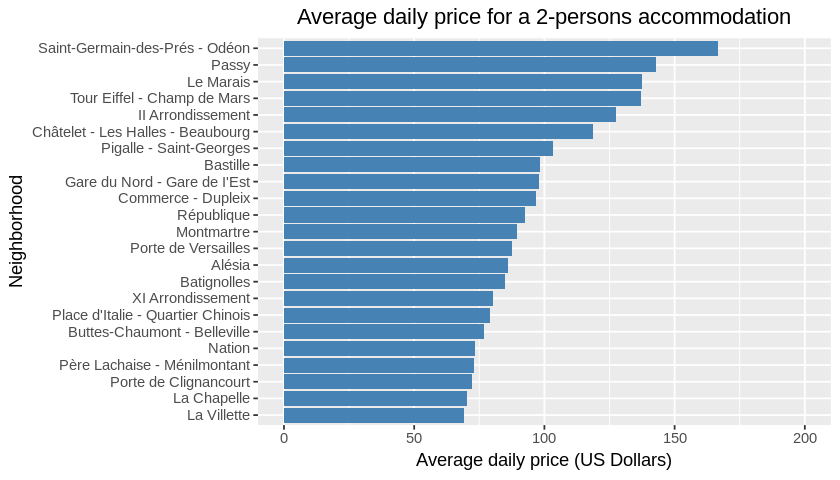

In [7]:
N2 <- gsub(".",".",as.character(data_n$price),fixed=TRUE)
data_n$price = as.numeric(gsub("\\$","",N2))
#data_n[!is.na(data_n$price), ]
agg<-aggregate(list(data_n$price), list(data_n$host_neighbourhood), mean,na.rm = TRUE)
t <- as.data.frame(agg)
t <-rename(t, neighbourhood =1, Avg = 2)
t$neighbourhood <- factor(t$neighbourhood, levels = t$neighbourhood[order(t$Avg)])
options(repr.plot.width=7, repr.plot.height=4)
invisible(p<-ggplot(t, aes(x=neighbourhood, y=Avg))+
  geom_bar(stat="identity",fill="steelblue")+scale_y_continuous(limits=c(0,200)))
        
print(p + labs(y="Average daily price (US Dollars)", x = "Neighborhood", title 
                = "Average daily price for a 2-persons accommodation")+theme(plot.title = element_text(hjust = 0.5) )+coord_flip())

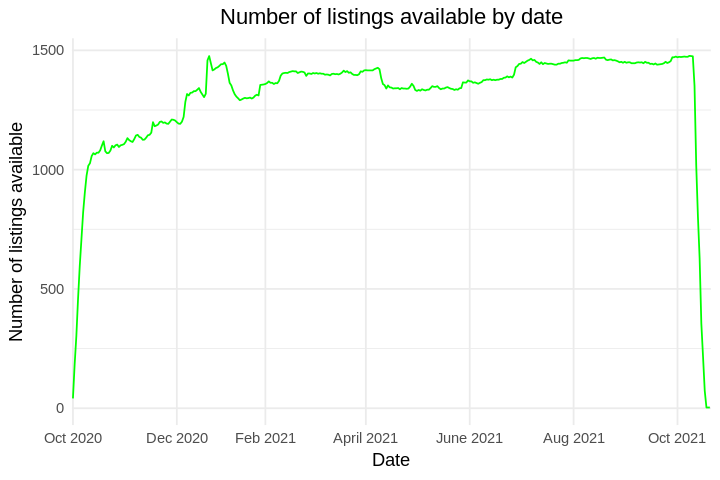

In [8]:
date_new <-calendar%>%filter(calendar$available == 't')
t <- as.data.frame(table(date_new$date))

options(repr.plot.width=6, repr.plot.height=4)

invisible(p<-ggplot(t, aes(x=t$Var1, y=t$Freq, color='color'))+
  geom_line(color="green", group = 1)+theme_minimal()
          + scale_x_discrete(breaks = c("2020-10-14", "2020-12-14", "2021-02-04","2021-04-04","2021-06-04","2021-08-04","2021-10-04"),
                             labels=c("Oct 2020", "Dec 2020", "Feb 2021","April 2021","June 2021","Aug 2021", "Oct 2021")))
print(p + labs(y="Number of listings available", x = "Date", title 
                = "Number of listings available by date")+theme(plot.title = element_text(hjust = 0.5))                 
)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

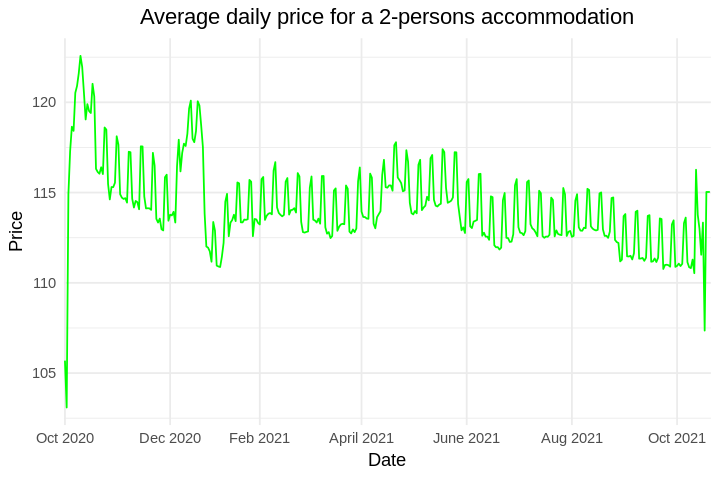

In [9]:
date_new <-calendar%>%filter(calendar$available == 't')
N2 <- gsub(".",".",as.character(date_new$price),fixed=TRUE)
date_new$price = as.numeric(gsub("\\$","",N2))
#data_n[!is.na(data_n$price), ]

agg<-aggregate(list(date_new$price), list(date_new$date), mean,na.rm = TRUE)
t <- as.data.frame(agg)
t <-rename(t, date =1, Avg = 2)


t$Avg <- t$Avg *0.85

options(repr.plot.width=6, repr.plot.height=4)

invisible(p<-ggplot(t, aes(x=t$date, y=t$Avg, color='color'))+
  geom_line(color="green", group = 1)+theme_minimal()
          + scale_x_discrete(breaks = c("2020-10-14", "2020-12-14", "2021-02-04","2021-04-04","2021-06-04","2021-08-04","2021-10-04"),
                             labels=c("Oct 2020", "Dec 2020", "Feb 2021","April 2021","June 2021","Aug 2021", "Oct 2021")))
print(p + labs(y="Price", x = "Date", title 
        = "Average daily price for a 2-persons accommodation")+theme(plot.title = element_text(hjust = 0.5) ))

In [ ]:
install.packages('tidyverse')
install.packages('lattice')
install.packages('caret')
install.packages('GGally')
install.packages('treemap')
install.packages('leaflet')
install.packages('rgdal')
install.packages('geojsonio')
install.packages('RColorBrewer')
install.packages('sp')
install.packages('purrr')

In [8]:
library(tidyverse)
library(lattice)
library(caret)
library(GGally)
library(treemap)
library(leaflet)
library(rgdal)
library(geojsonio)
library(RColorBrewer)
library(sp)
library(purrr)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.2
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'lattice' was built under R version 3.6.3"Warning message:
"package 'caret' was built under R version 3.6.3"
Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

Warning message:
"package 'GGally' was built under R 

In [2]:
states <- geojsonio::geojson_read("C://Users//Toshiba//Documents//R_Programming//AirbnbProjet//arrondissements.geojson", what = "sp")


In [3]:
neighbourhood.freq2=data.frame(table(data$neighbourhood_cleansed))


neighbourhood.freq=neighbourhood.freq2
neighbourhood.freq$order <- states[[6]]
neighbourhood.freq$frqtrue <- neighbourhood.freq$Freq[match(neighbourhood.freq$order,neighbourhood.freq$Var1)]
neighbourhood.freq

Var1                Freq order               frqtrue
1  Batignolles-Monceau 4494 Opéra               3235   
2  Bourse              2286 Buttes-Montmartre   7474   
3  Buttes-Chaumont     3813 Batignolles-Monceau 4494   
4  Buttes-Montmartre   7474 Ménilmontant        3825   
5  Élysée              1789 Passy               3267   
6  Entrepôt            4628 Luxembourg          1958   
7  Gobelins            2330 Reuilly             2731   
8  Hôtel-de-Ville      2009 Panthéon            2198   
9  Louvre              1394 Élysée              1789   
10 Luxembourg          1958 Louvre              1394   
11 Ménilmontant        3825 Bourse              2286   
12 Observatoire        2548 Buttes-Chaumont     3813   
13 Opéra               3235 Hôtel-de-Ville      2009   
14 Palais-Bourbon      1829 Observatoire        2548   
15 Panthéon            2198 Temple              3090   
16 Passy               3267 Palais-Bourbon      1829   
17 Popincourt          6459 Vaugirard           4977   
18 Reuilly             2731 Gobelins            2330   
19 Temple              3090 Entrepôt            4628   
20 Vaugirard           4977 Popincourt          6459

In [12]:
m <- leaflet(states) %>%
  #setView(-96, 37.8, 4) %>%
  addTiles()
m %>% addPolygons()

HTML widgets cannot be represented in plain text (need html)

In [13]:
m %>% addPolygons(
  fillColor = ~pal(neighbourhood.freq[,4]),
  weight = 2,
  opacity = 1,
  color = "white",
  dashArray = "3",
  fillOpacity = 0.7)

HTML widgets cannot be represented in plain text (need html)

In [14]:
m %>% addPolygons(
  fillColor =  ~pal(neighbourhood.freq[,4]),
  weight = 2,
  opacity = 1,
  color = "white",
  dashArray = "3",
  fillOpacity = 0.7,
  highlight = highlightOptions(
    weight = 5,
    color = "#666",
    dashArray = "",
    fillOpacity = 0.7,
    bringToFront = TRUE))

HTML widgets cannot be represented in plain text (need html)

In [17]:
labels <- sprintf(
  "<strong>%s</strong><br/>%g listing",
  neighbourhood.freq[,3], neighbourhood.freq[,4]
) %>% lapply(htmltools::HTML)
m <- m %>% addPolygons(
  fillColor = ~pal(neighbourhood.freq[,4]),
  weight = 2,
  opacity = 1,
  color = "white",
  dashArray = "3",
  fillOpacity = 0.7,
  highlight = highlightOptions(
    weight = 5,
    color = "#666",
    dashArray = "",
    fillOpacity = 0.7,
    bringToFront = TRUE),
  label = labels,
  labelOptions = labelOptions(
    style = list("font-weight" = "normal", padding = "3px 8px"),
    textsize = "15px",
    direction = "auto"))
m

HTML widgets cannot be represented in plain text (need html)

In [20]:
bins <- c(0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, Inf)
pal <- colorBin("YlOrRd", domain = neighbourhood.freq[,4], bins = bins)
m %>% addLegend(pal = pal, values = neighbourhood.freq[,4], opacity = 0.7, title = NULL, position = "topright")

HTML widgets cannot be represented in plain text (need html)

In [21]:
s<- leaflet(data = data[,30:31],options = leafletOptions(minZoom = 5, maxZoom = 14)) %>% addTiles() %>%
  addMarkers(lng = ~longitude, lat = ~latitude, clusterOptions = markerClusterOptions())
s

HTML widgets cannot be represented in plain text (need html)